#  DATA SCIENCE CAPSTONE PROJECT                                                                                                                                                                                                            DOMAIN : HEALTHCARE                        

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("health care diabetes.csv")

# EDA of the DATA

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Glucose', ylabel='Count'>

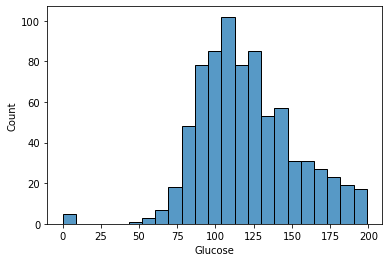

In [9]:
sns.histplot(df["Glucose"])

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

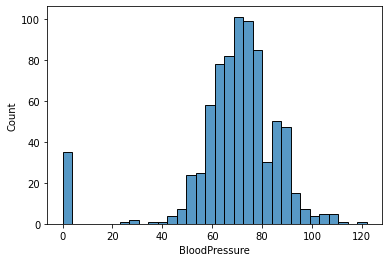

In [10]:
sns.histplot(df["BloodPressure"])

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

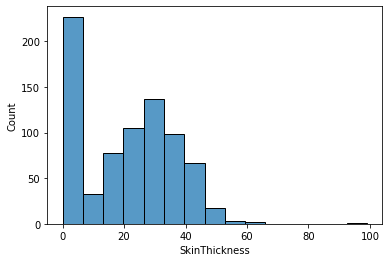

In [11]:
sns.histplot(df["SkinThickness"])

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

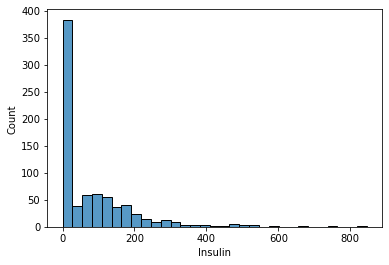

In [12]:
sns.histplot(df["Insulin"])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

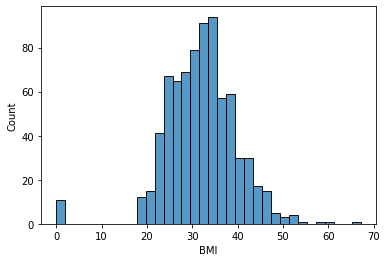

In [13]:
sns.histplot(df["BMI"])

In [14]:
#Filling the 0 values with 50% of the data as 0 has no meaning
df["Glucose"] = df["Glucose"].replace(0,117)
df["BloodPressure"] = df["BloodPressure"].replace(0,72)
df["SkinThickness"] = df["SkinThickness"].replace(0,23)
df["Insulin"] = df["Insulin"].replace(0,117)
df["BMI"] = df["BMI"].replace(0,32.00)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,117,33.6,0.627,50,1
1,1,85,66,29,117,26.6,0.351,31,0
2,8,183,64,23,117,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df_copy =df.copy()

In [45]:
df_copy.to_csv('Train_new.csv')

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,136.776042,87.179770,14.000,117.00000,117.0000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Week 2

In [19]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

The outcome data is imbalanced

C:\Users\ankita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

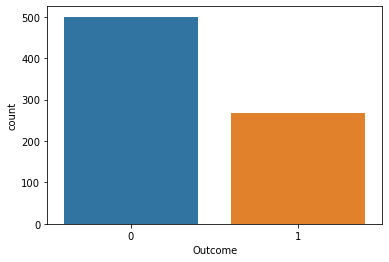

In [20]:
sns.countplot(df['Outcome'])

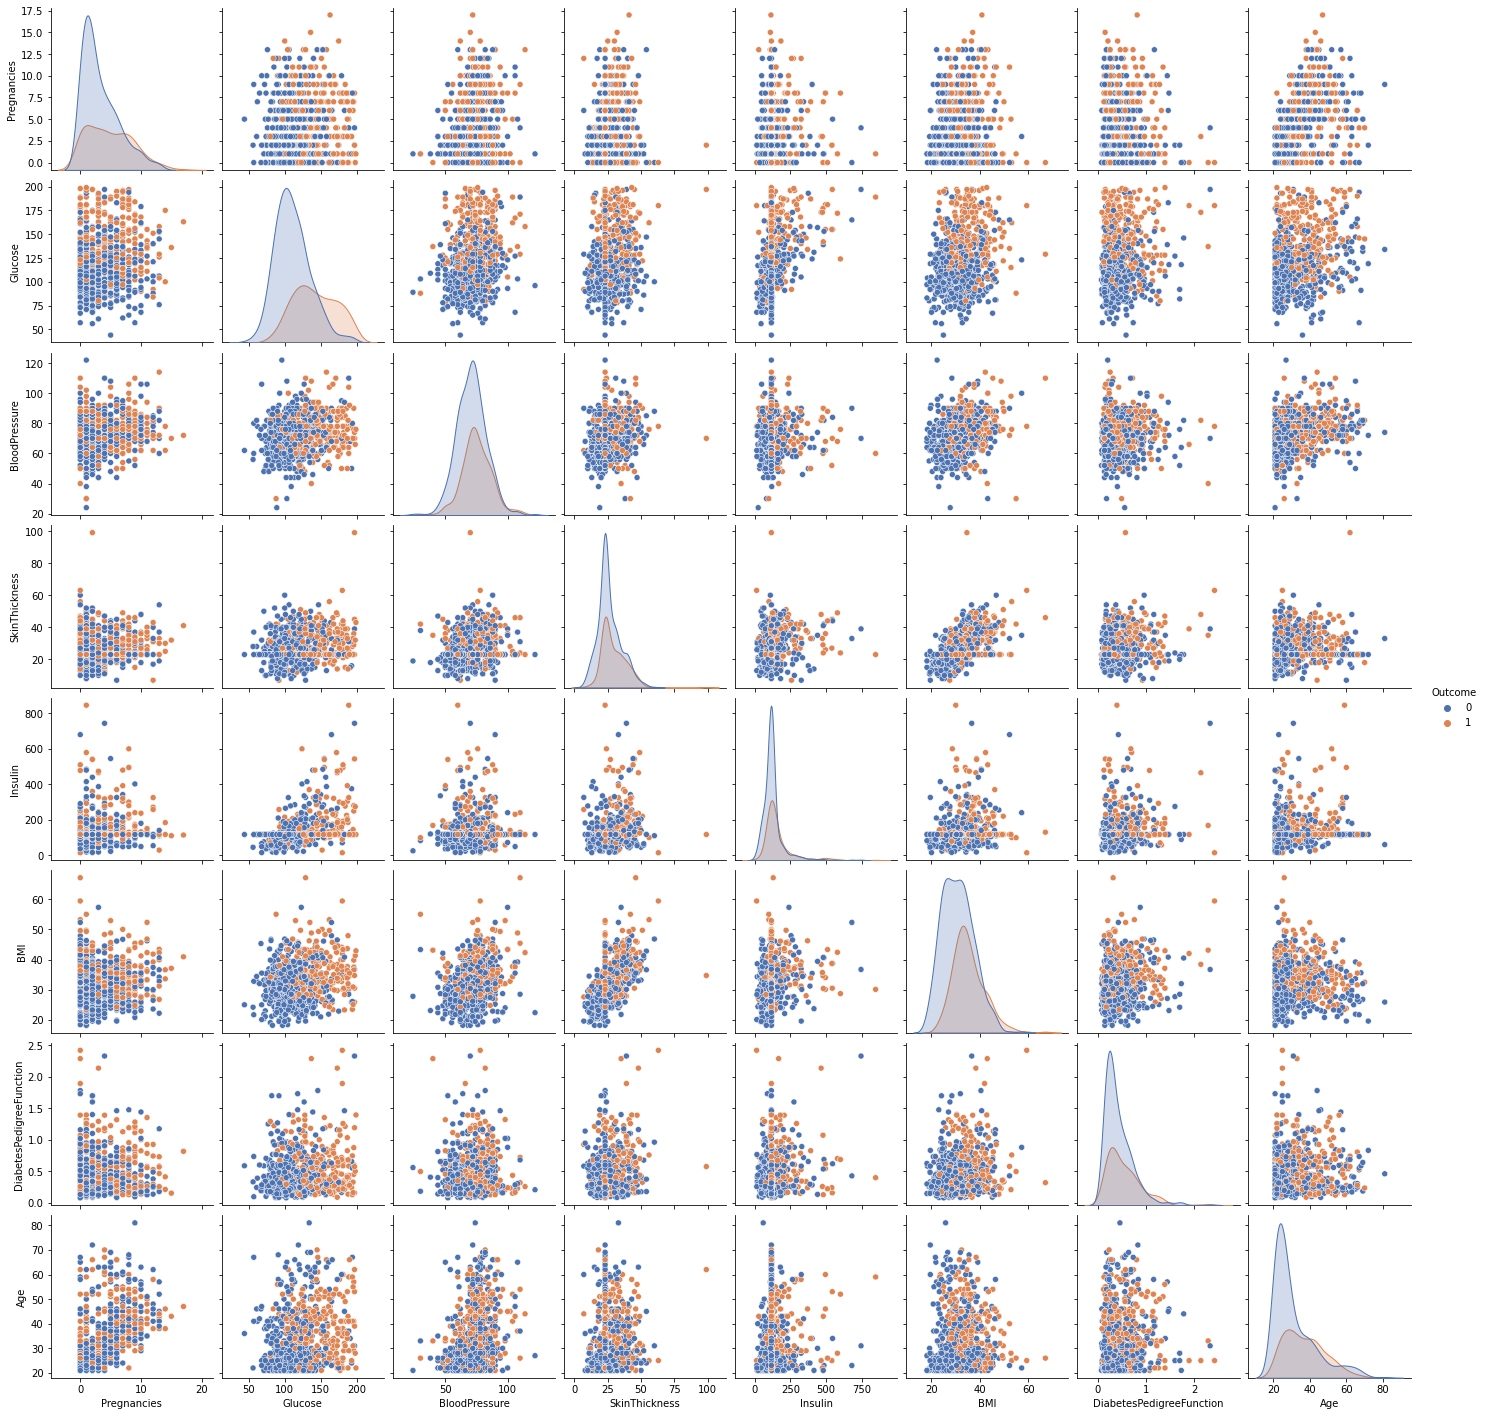

In [21]:
#Scatterplot of the variables
sns.pairplot(df,hue='Outcome',kind= 'scatter',diag_kind="kde",palette="deep")

In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,0.017009,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.417081,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,0.038200,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.190513,0.546951,0.142977,0.054514,0.189065
Insulin,0.017009,0.417081,0.038200,0.190513,1.000000,0.182968,0.132982,0.086489,0.200049
BMI,0.021546,0.231400,0.281132,0.546951,0.182968,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.132982,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,0.086489,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.200049,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

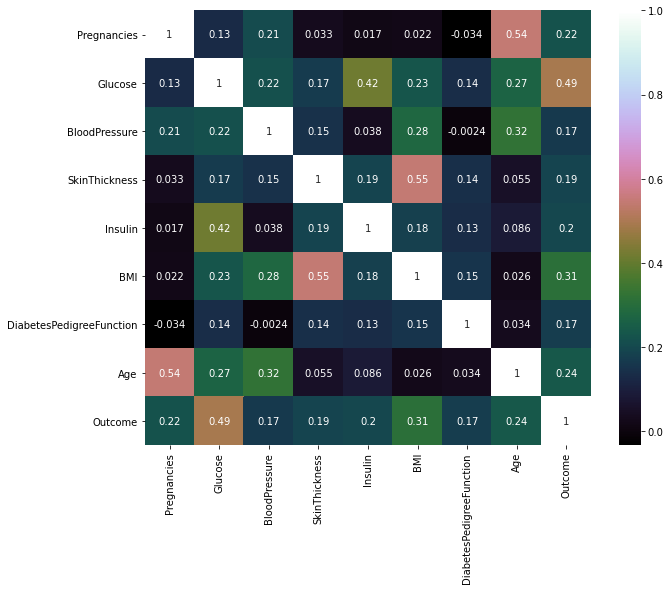

In [23]:
#ploting the correlation matrix
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot = True,cmap = "cubehelix")

# Week 3  Model Building

In [24]:
x = df.drop('Outcome',axis=1)
y = df.Outcome

In [25]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

Spliting the dataset for training and testing the data

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
le = LogisticRegression(max_iter = 500)
le.fit(x_train,y_train)
y_pred = le.predict(x_test)
ac_le = accuracy_score(y_test,y_pred)
print("Accuracy of Logistic Regression Model:",ac_le)
print("Confusion Matrix of Logistic Regression Model:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy of Logistic Regression Model: 0.7662337662337663
Confusion Matrix of Logistic Regression Model:
 [[87 16]
 [20 31]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       103
           1       0.66      0.61      0.63        51

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
le_probs = le.predict_proba(x_test)
le_probs = le_probs[:,1]
le_auc= roc_auc_score(y_test,le_probs)
le_fpr,le_tpr,thresholds  = roc_curve(y_test,le_probs)
print("AUC",le_auc)

AUC 0.8558918713116315


# Naive Bayes Model

In [30]:
from sklearn.naive_bayes import GaussianNB
nb =  GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
ac_nb = accuracy_score(y_test,y_pred)
print("Accuracy of Naive Bayes Model:",ac_nb)
print("Confusion Matrix of Naive Bayes Model:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy of Naive Bayes Model: 0.7337662337662337
Confusion Matrix of Naive Bayes Model:
 [[81 22]
 [19 32]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       103
           1       0.59      0.63      0.61        51

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.74      0.73      0.74       154



In [31]:
nb_probs = nb.predict_proba(x_test)
nb_probs = nb_probs[:,1]
nb_auc= roc_auc_score(y_test,nb_probs)
nb_fpr,nb_tpr,thresholds  = roc_curve(y_test,nb_probs)
print("AUC",nb_auc)

AUC 0.8180087569008185


# K Nearest Neighbor Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_acclist = []
for K in range(21):
    K += 1
    knn= KNeighborsClassifier(n_neighbors =K)
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    knn_results = confusion_matrix(y_test,knn_pred)
    knn_score = accuracy_score(y_test,knn_pred)
    print("The accuracy of KNN model for k",K,"is:%0.4f"%knn_score)
    print("Confusion Matrix :\n", knn_results)
    knn_acclist.append(knn_score)
ac_knn = max(knn_acclist)
print("Maximum Accuracy using KNN Model: %0.4f"%ac_knn)  

The accuracy of KNN model for k 1 is:0.6169
Confusion Matrix :
 [[76 27]
 [32 19]]
The accuracy of KNN model for k 2 is:0.7143
Confusion Matrix :
 [[92 11]
 [33 18]]
The accuracy of KNN model for k 3 is:0.7208
Confusion Matrix :
 [[84 19]
 [24 27]]
The accuracy of KNN model for k 4 is:0.7468
Confusion Matrix :
 [[92 11]
 [28 23]]
The accuracy of KNN model for k 5 is:0.7597
Confusion Matrix :
 [[88 15]
 [22 29]]
The accuracy of KNN model for k 6 is:0.7468
Confusion Matrix :
 [[89 14]
 [25 26]]
The accuracy of KNN model for k 7 is:0.7597
Confusion Matrix :
 [[88 15]
 [22 29]]
The accuracy of KNN model for k 8 is:0.7662
Confusion Matrix :
 [[90 13]
 [23 28]]
The accuracy of KNN model for k 9 is:0.7662
Confusion Matrix :
 [[86 17]
 [19 32]]
The accuracy of KNN model for k 10 is:0.7922
Confusion Matrix :
 [[91 12]
 [20 31]]
The accuracy of KNN model for k 11 is:0.7857
Confusion Matrix :
 [[89 14]
 [19 32]]
The accuracy of KNN model for k 12 is:0.7792
Confusion Matrix :
 [[90 13]
 [21 30]]
T

In [33]:
knn_probs = knn.predict_proba(x_test)
knn_probs = knn_probs[:,1]
knn_auc= roc_auc_score(y_test,knn_probs)
knn_fpr,knn_tpr,thresholds  = roc_curve(y_test,knn_probs)
print("Classification report:\n",classification_report(y_test,y_pred))
print("AUC",knn_auc)

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       103
           1       0.59      0.63      0.61        51

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.74      0.73      0.74       154

AUC 0.8210546354464116


# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
re = RandomForestClassifier(n_estimators=20)
re.fit(x_train,y_train)
y_pred = re.predict(x_test)
ac_re = accuracy_score(y_test,y_pred)
print("Accuracy of Random Forest Classifier:",ac_re)
print("Confusion Matrix of Random Forest Classifier:\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy of Random Forest Classifier: 0.7402597402597403
Confusion Matrix of Random Forest Classifier:
 [[87 16]
 [24 27]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       103
           1       0.63      0.53      0.57        51

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154



In [35]:
rdc_probs = re.predict_proba(x_test)
rdc_probs = rdc_probs[:,1]
rdc_auc= roc_auc_score(y_test,knn_probs)
rdc_fpr,rdc_tpr,thresholds  = roc_curve(y_test,rdc_probs)
print("AUC",rdc_auc)

AUC 0.8210546354464116


# Support Vendor Machine

In [36]:
from sklearn.svm import SVC
sv = SVC(kernel='rbf', C=1e9, gamma=1e-07,probability=True,)
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
ac_sv = accuracy_score(y_test,y_pred)
print("Accuracy of Support Vendor Machine:",ac_sv)
print("Confusion Matrix of Support Vendor Machine :\n",confusion_matrix(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy of Support Vendor Machine: 0.8051948051948052
Confusion Matrix of Support Vendor Machine :
 [[90 13]
 [17 34]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.72      0.67      0.69        51

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



In [37]:
svm_probs = sv.predict_proba(x_test)
svm_probs = svm_probs[:,1]
svm_auc= roc_auc_score(y_test,svm_probs)
svm_fpr,svm_tpr,thresholds  = roc_curve(y_test,svm_probs)
print("AUC",svm_auc)

AUC 0.8701694269940986


In [38]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

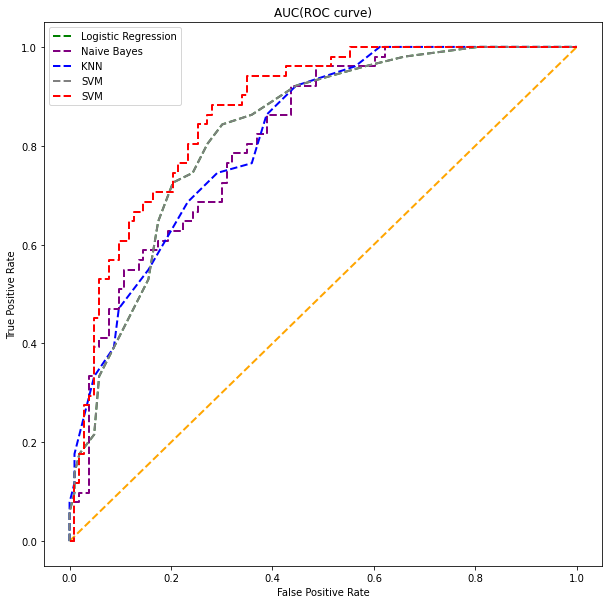

In [39]:
# ploting the roc curve of every model
plt.subplots(figsize=(10,10))
plt.plot(p_fpr, p_tpr, color ='orange',lw=2,linestyle= '--')
plt.plot(rdc_fpr,rdc_tpr, color = 'green',lw=2,linestyle= '--',label='Logistic Regression')
plt.plot(nb_fpr,nb_tpr, color = 'purple',lw=2,linestyle= '--',label='Naive Bayes')
plt.plot(knn_fpr,knn_tpr, color = 'blue',lw=2,linestyle= '--',label='KNN')
plt.plot(rdc_fpr,rdc_tpr, color = 'Grey',lw=2,linestyle= '--',label='SVM')
plt.plot(svm_fpr,svm_tpr, color = 'red',lw=2,linestyle= '--',label='SVM')
plt.title('AUC(ROC curve)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [40]:
data = [['LogisticRegression',ac_le],['Naive Bayes',ac_nb],['KNN',ac_knn],['Support Vendor Machine',ac_sv],['Random Forest',ac_re]]
df_acc_score = pd.DataFrame(data,columns= ['Model Name','Accuracy Score'])
df_acc_score

,Model Name,Accuracy Score
0,LogisticRegression,0.766234
1,Naive Bayes,0.733766
2,KNN,0.792208
3,Support Vendor Machine,0.805195
4,Random Forest,0.740260


As, we can conclude that Support Vendor Machine is the best model for this dataset.